## Lab 2
Hannah Ketner

**Part 1**

In [80]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# defining height and gravity as constant 
h = 4000
g = 9.81
#solving analytically for the time of free fall
time_freefall = np.sqrt(2*h/g)
print("Time for freefall calculated analytically is ", time_freefall)

Time for freefall calculated analytically is  28.55686245854129


  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  3.030e-01 ...  2.818e+01  2.848e+01]
        y: [[ 4.000e+03  4.000e+03 ...  1.044e+02  2.015e+01]
            [ 0.000e+00 -2.973e+00 ... -2.765e+02 -2.794e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[ 0.000e+00, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
The time where the mass hits the bottom is 28.5568624585413 s which is effectively equal to the time calculated analytically.


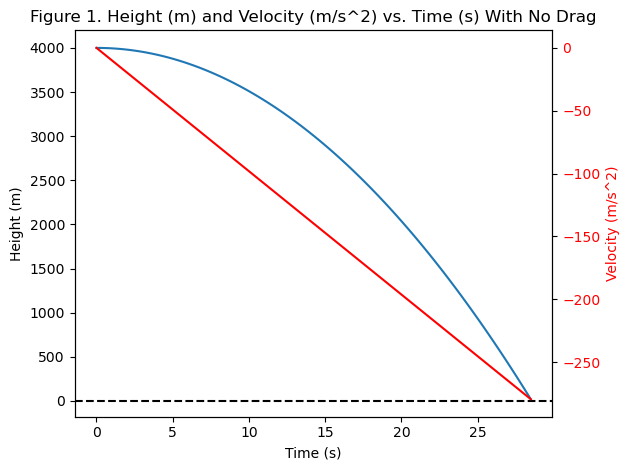

In [81]:
# assuming alpha 0, gamma 2
alpha = 0
gamma = 2

# thing 1: derivatives - differential equations for position
def derivatives(t,s):
    y,v = s
    dydt = v
    dvdt = -g - alpha*(dydt)**gamma
    return [dydt,dvdt]

# thing 2: timespan
t0,tf = (0,30)
t_eval = np.linspace(t0,tf,100)

# thing 3: initial conditions
y0 = [4000,0]

# solve

# stopping event for when bottom of mineshaft is hit
def stopping(t,s):
    return s[0] - 0

stopping.terminal = True

#integrating potential differential equation over timespan specified above with event given
soln = solve_ivp(fun = derivatives, t_span = (t0,tf), y0=y0, t_eval=t_eval,events=stopping)
print(soln)

# time, position, and velocity defined from soln
t = soln.t
x = soln.y[0]
v = soln.y[1]

#plotting
fig,ax = plt.subplots(1,)
ax.plot(t,x)

ax2 = ax.twinx()
ax2.plot(t,v,color='red')
ax.axhline(0.0, color = 'black',linestyle='--')
ax2.set_ylabel("Velocity (m/s^2)",color='red')
ax.set_ylabel("Height (m)",color='black')
ax.set_xlabel("Time (s)",color='black')
ax.set_title("Figure 1. Height (m) and Velocity (m/s^2) vs. Time (s) With No Drag",color='black')
ax2.tick_params(axis="y", labelcolor='red')
fig.tight_layout()

time_event = soln.t_events[0][0]
print("The time where the mass hits the bottom is", time_event, "s which is effectively equal to the time calculated analytically.")

**Part 2**

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  3.336e-01 ...  2.802e+01  2.835e+01]
        y: [[ 4.000e+03  3.999e+03 ...  1.497e+02  5.753e+01]
            [ 0.000e+00 -3.272e+00 ... -2.748e+02 -2.781e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[-9.095e-13, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0


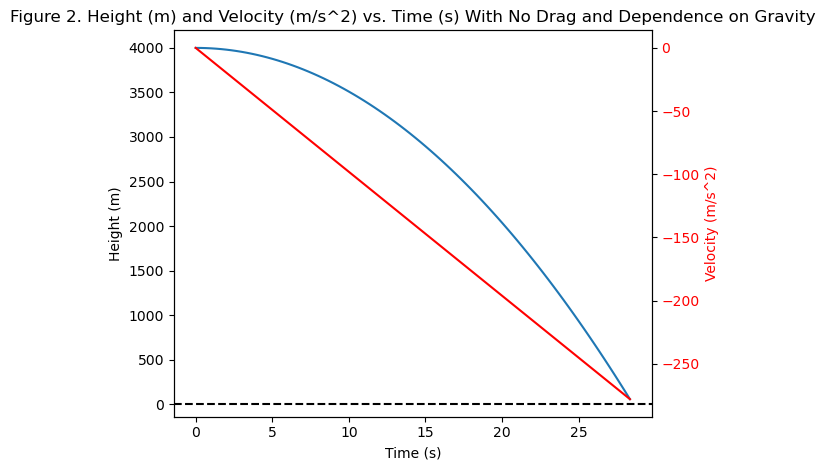

In [95]:
# defining constants
g0 = 9.81
Rad = 6378.1e3
alpha = 0
gamma = 2
h = 4000

# thing 1: derivatives - differential equations for position
def derivatives(t,s):
    y,v = s
    r = Rad - h + y
    dydt = v
    g = g0 * (r/Rad)
    dvdt = -g - alpha*v**gamma
    return [dydt,dvdt]

# thing 2: timespan
t0,tf = (0,500)
t_eval = np.linspace(t0,tf,1500)
#t0,tf = (0,1500)
#t_eval = np.linspace(t0,tf,1000)

# thing 3: initial conditions
y0 = [h,0]

#event where the mass hits bottom
def hit_bottom(t,s):
    y,v = s
    return y

hit_bottom.terminal = True
hit_bottom.direction = -1 

#integrating potential differential equation over timespan specified above with event given
soln = solve_ivp(fun = derivatives, t_span = (t0,tf), y0=y0, t_eval=t_eval, events=hit_bottom)
print(soln)

# time, position, and velocity defined from soln
t = soln.t
x = soln.y[0]
v = soln.y[1]

#plotting
fig,ax = plt.subplots(1,)
ax.plot(t,x)
ax2 = ax.twinx()
ax2.plot(t,v,color='red')
ax.axhline(0.0, color = 'black',linestyle='--')
ax2.set_ylabel("Velocity (m/s^2)",color='red')
ax.set_ylabel("Height (m)",color='black')
ax.set_xlabel("Time (s)",color='black')
ax.set_title("Figure 2. Height (m) and Velocity (m/s^2) vs. Time (s) With No Drag and Dependence on Gravity",color='black')
ax2.tick_params(axis="y", labelcolor='red')
fig.tight_layout()

In [57]:
print("Incorporating a height-dependent g increases the fall time very slightly by approximately 0.01 s.")

Incorporating a height-dependent g increases the fall time very slightly by approximately 0.01 s.


  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.502e+00 ...  8.258e+01  8.408e+01]
        y: [[ 4.000e+03  3.989e+03 ...  8.403e+01  9.633e+00]
            [ 0.000e+00 -1.431e+01 ... -4.948e+01 -4.946e+01]]
      sol: None
 t_events: [array([ 8.428e+01])]
 y_events: [array([[-2.842e-13, -4.946e+01]])]
     nfev: 128
     njev: 0
      nlu: 0


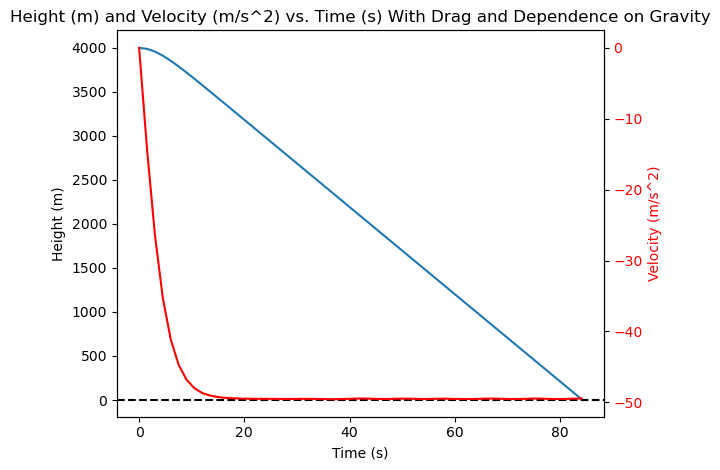

In [98]:
#defining constants, with alpha not equal to 0 now
g0 = 9.81
Rad = 6378.1e3
alpha = 0.004
gamma = 2
h = 4000

# thing 1: derivatives - differential equations for position
def derivatives(t,s):
    y,v = s
    r = Rad - h + y
    dydt = v
    g = g0 * (r/Rad)
    dvdt = -g + alpha*np.abs(v**gamma)
    return [dydt,dvdt]

# thing 2: timespan
t0,tf = (0,1500)
t_eval = np.linspace(t0,tf,1000)

# thing 3: initial conditions
y0 = [h,0]

#event where the mass hits bottom
def hit_bottom(t,s):
    y,v = s
    return y

hit_bottom.terminal = True
hit_bottom.direction = -1 

#integrating potential differential equation over timespan specified above with event given
soln = solve_ivp(fun = derivatives, t_span = (t0,tf), y0=y0, t_eval=t_eval, events=hit_bottom)
print(soln)

# time, position, and velocity defined from soln
t = soln.t
x = soln.y[0]
v = soln.y[1]

#plotting
fig,ax = plt.subplots(1,)
ax.plot(t,x)
ax2 = ax.twinx()
ax2.plot(t,v,color='red')
ax.axhline(0.0, color = 'black',linestyle='--')
ax2.set_ylabel("Velocity (m/s^2)",color='red')
ax.set_ylabel("Height (m)",color='black')
ax.set_xlabel("Time (s)",color='black')
ax.set_title("Height (m) and Velocity (m/s^2) vs. Time (s) With Drag and Dependence on Gravity",color='black')
ax2.tick_params(axis="y", labelcolor='red')
fig.tight_layout()

In [75]:
print("The value of alpha was calibrated by manually adjusting the value until the time for the hit_bottom event was approximately at 50 m/s. The fall time is now 84 s, which is around 56 s more than our previous fall time.")

The value of alpha was calibrated by manually adjusting the value until the time for the hit_bottom event was approximately at 50 m/s. The fall time is now 84 s, which is around 56 s more than our previous fall time.


**Part 3**

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  2.002e-01 ...  2.823e+01  2.843e+01]
        y: [[ 2.500e+00  2.500e+00 ... -2.848e+00 -2.962e+00]
            [ 4.000e+03  4.000e+03 ...  9.194e+01  3.632e+01]
            [ 0.000e+00 -2.859e-05 ... -5.684e-01 -5.765e-01]
            [ 0.000e+00 -1.964e+00 ... -2.769e+02 -2.788e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[-3.038e+00,  0.000e+00, -5.818e-01, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
The test mass hits the wall before it reaches the bottom due to it reaching 0 in transverse direction before hitting 4000 m with height.


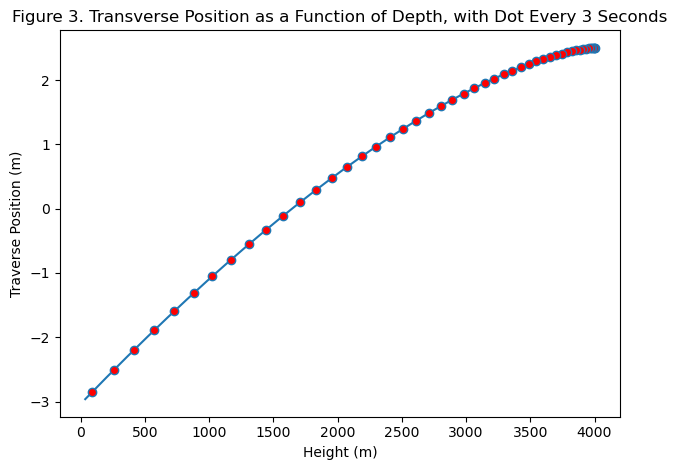

In [96]:
#defining constants, with no drag
omega = 7.272e-5
g0 = 9.81
Rad = 6378.1e3
alpha = 0
gamma = 2
h = 4000

# thing 1: derivatives - differential equations for positions, with x and y components now - vertical and transverse directions
def derivatives(t,s):
    x,y,vx,vy = s
    r = Rad - h + y
    dydt = vy
    dxdt = vx
    g = g0 * (r/Rad)

    ax = 2*omega*vy
    ay = -g - 2*omega*vx
    return vx,vy,ax,ay

# thing 2: timespan
t0,tf = (0,200)
t_eval = np.linspace(t0,tf,1000)


#event where bottom is hit by mass
def hit_bottom(t,s):
    x,y,vx,vy = s
    return y

hit_bottom.terminal = True
hit_bottom.direction = -1 

# thing 3: initial conditions
y0 = [2.5,h,0,0]

#integrating potential differential equation over timespan specified above with event given
soln = solve_ivp(fun = derivatives, t_span = (t0,tf), y0=y0, t_eval=t_eval,events=hit_bottom)
print(soln)

# time, position, and velocity defined from soln
t = soln.t
x = soln.y[0]
y = soln.y[1]
vx = soln.y[2]
vy = soln.y[3]

#plotting
fig,ax = plt.subplots(1,)
ax.plot(y,x,marker='o',mfc='red', markevery=3)
ax.set_ylabel("Traverse Position (m)")
ax.set_xlabel("Height (m)",color='black')
ax.set_title("Figure 3. Transverse Position as a Function of Depth, with Dot Every 3 Seconds",color='black')
fig.tight_layout()

print("The test mass hits the wall before it reaches the bottom due to it reaching 0 in transverse direction before hitting 4000 m with height.")

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  2.002e-01 ...  8.388e+01  8.408e+01]
        y: [[ 2.500e+00  2.500e+00 ... -2.080e+01 -2.092e+01]
            [ 4.000e+03  4.000e+03 ...  1.966e+01  9.757e+00]
            [ 0.000e+00 -2.859e-05 ... -5.789e-01 -5.803e-01]
            [ 0.000e+00 -1.963e+00 ... -4.953e+01 -4.953e+01]]
      sol: None
 t_events: [array([ 8.428e+01])]
 y_events: [array([[-2.103e+01,  2.274e-13, -5.818e-01, -4.953e+01]])]
     nfev: 122
     njev: 0
      nlu: 0
The test mass hits the wall before it reaches the bottom due to it reaching 0 in transverse direction before hitting 4000 m in vertical direction, but it hits later at 3000 m in vertical direction.


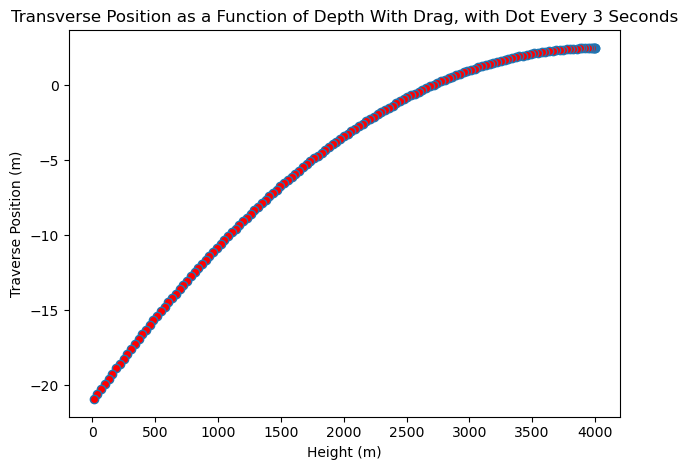

In [97]:
#constants
omega = 7.272e-5
g0 = 9.81
Rad = 6378.1e3
alpha = 0.004
gamma = 2
h = 4000

# thing 1: derivatives - differential equations for positions, with x and y components now - vertical and transverse directions
def derivatives(t,s):
    x,y,vx,vy = s
    r = Rad - h + y
    dydt = vy
    dxdt = vx
    g = g0 * (r/Rad)

    ax = 2*omega*vy
    ay = -g + alpha*np.abs(dydt)**gamma - 2*omega*vx
    return vx,vy,ax,ay

# thing 2: timespan
t0,tf = (0,200)
t_eval = np.linspace(t0,tf,1000)

#event where mass has hit the bottom of the mineshaft
def hit_bottom(t,s):
    x,y,vx,vy = s
    return y

hit_bottom.terminal = True
hit_bottom.direction = -1 

# thing 3: initial conditions
y0 = [2.5,h,0,0]

#integrating potential differential equation over timespan specified above with event given
soln = solve_ivp(fun = derivatives, t_span = (t0,tf), y0=y0, t_eval=t_eval,events=hit_bottom)
print(soln)

# time, position, and velocity defined from soln
t = soln.t
x = soln.y[0]
y = soln.y[1]
vx = soln.y[2]
vy = soln.y[3]

#plotting
fig,ax = plt.subplots(1,)
ax.plot(y,x,marker='o',mfc='red', markevery=3)
ax.set_ylabel("Traverse Position (m)")
ax.set_xlabel("Height (m)",color='black')
ax.set_title("Transverse Position as a Function of Depth With Drag, with Dot Every 3 Seconds",color='black')
fig.tight_layout()

print("The test mass hits the wall before it reaches the bottom due to it reaching 0 in transverse direction before hitting 4000 m in vertical direction, but it hits later at 3000 m in vertical direction.")

**Part 4**

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  3.000e-01 ...  2.194e+03  2.194e+03]
        y: [[ 4.000e+03  4.000e+03 ... -1.220e+07 -1.220e+07]
            [ 0.000e+00 -2.943e+00 ... -3.224e+03 -3.222e+03]]
      sol: None
 t_events: [array([ 2.195e+03])]
 y_events: [array([[-1.220e+07, -3.219e+03]])]
     nfev: 62
     njev: 0
      nlu: 0
The object reaches the other side the height is at double the Earth's radius (6378.1e3 m) at approximately 2195 seconds.


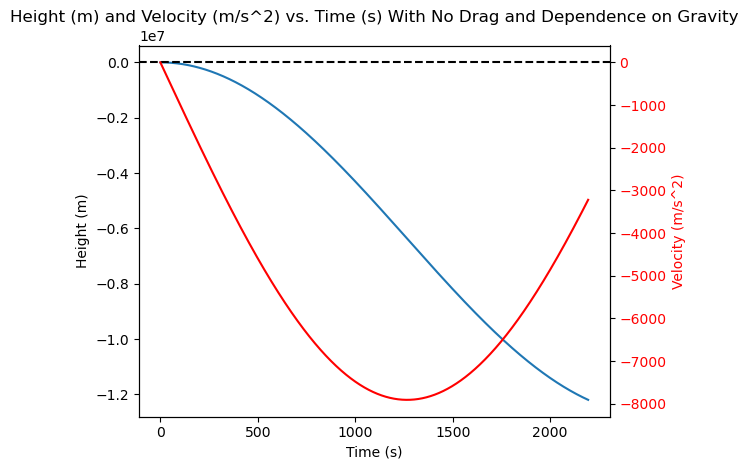

In [140]:
#constants
g0 = 9.81
Rad = 6378.1e3
alpha = 0
gamma = 0
h = 4000

# thing 1: derivatives
def derivatives(t,s):
    y,v = s
    r = Rad - h + y
    dydt = v
    g = g0 * (r/Rad)
    dvdt = -g - alpha*v**gamma
    return [dydt,dvdt]

# thing 2: timespan
t0,tf = (0,3000)
t_eval = np.linspace(t0,tf,10000)

# thing 3: initial conditions
y0 = [h,0]

#event where bottom is hit
def hit_bottom(t,s):
    y,v = s
    return s[0] + 1.22e7

hit_bottom.terminal = True
hit_bottom.direction = -1 

#integrating potential differential equation over timespan specified above with event given
soln = solve_ivp(fun = derivatives, t_span = (t0,tf), y0=y0, t_eval=t_eval, events=hit_bottom)
print(soln)

# time, position, and velocity defined from soln
t = soln.t
x = soln.y[0]
v = soln.y[1]

#plotting
fig,ax = plt.subplots(1,)
ax.plot(t,x)
ax2 = ax.twinx()
ax2.plot(t,v,color='red')
ax.axhline(0.0, color = 'black',linestyle='--')
ax2.set_ylabel("Velocity (m/s^2)",color='red')
ax.set_ylabel("Height (m)",color='black')
ax.set_xlabel("Time (s)",color='black')
ax.set_title("Figure 4. Height (m) and Velocity (m/s^2) vs. Time (s) With No Drag and Dependence on Gravity",color='black')
ax2.tick_params(axis="y", labelcolor='red')
fig.tight_layout()

print("The object reaches the other side the height is at double the Earth's radius (6378.1e3 m) at approximately 2195 seconds.")

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  3.000e-01 ...  1.266e+03  1.267e+03]
        y: [[ 4.000e+03  4.000e+03 ... -6.374e+06 -6.376e+06]
            [ 0.000e+00 -2.943e+00 ... -7.911e+03 -7.910e+03]]
      sol: None
 t_events: [array([ 1.267e+03])]
 y_events: [array([[-6.378e+06, -7.910e+03]])]
     nfev: 56
     njev: 0
      nlu: 0
The object reaches the other side the height is at the Earth's radius (6378.1e3 m) at approximately 1267 seconds. The speed is 7910 m/s^2.


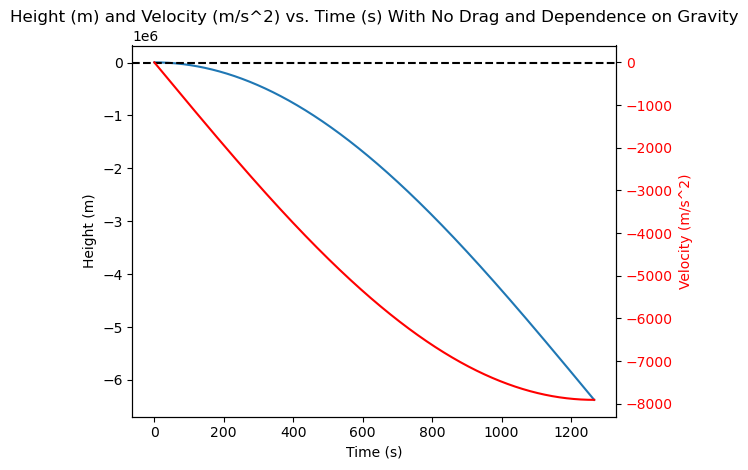

In [148]:
#constants
g0 = 9.81
Rad = 6378.1e3
alpha = 0
gamma = 0
h = 4000

# thing 1: derivatives
def derivatives(t,s):
    y,v = s
    r = Rad - h + y
    dydt = v
    g = g0 * (r/Rad)
    dvdt = -g - alpha*v**gamma
    return [dydt,dvdt]

# thing 2: timespan
t0,tf = (0,3000)
t_eval = np.linspace(t0,tf,10000)

# thing 3: initial conditions
y0 = [h,0]

#event where mass hits bottom
def hit_bottom(t,s):
    y,v = s
    return s[0] + 6378.1e3

hit_bottom.terminal = True
hit_bottom.direction = -1 

#integrating potential differential equation over timespan specified above with event given
soln = solve_ivp(fun = derivatives, t_span = (t0,tf), y0=y0, t_eval=t_eval, events=hit_bottom)
print(soln)

# time, position, and velocity defined from soln
t = soln.t
x = soln.y[0]
v = soln.y[1]

#plotting
fig,ax = plt.subplots(1,)
ax.plot(t,x)
ax2 = ax.twinx()
ax2.plot(t,v,color='red')
ax.axhline(0.0, color = 'black',linestyle='--')
ax2.set_ylabel("Velocity (m/s^2)",color='red')
ax.set_ylabel("Height (m)",color='black')
ax.set_xlabel("Time (s)",color='black')
ax.set_title("Height (m) and Velocity (m/s^2) vs. Time (s) With No Drag and Dependence on Gravity",color='black')
ax2.tick_params(axis="y", labelcolor='red')
fig.tight_layout()

print("The object reaches the other side the height is at the Earth's radius (6378.1e3 m) at approximately 1267 seconds. The speed is 7910 m/s^2.")

In [149]:
Rad = 6378.1e3
G = 6.6743e-11
M = 5.972e24

#finding velocity analytically
v = np.sqrt(Rad*(G*M/Rad**2))
print("The velocity is ", v, "m/s.")

#finding orbital period
T = Rad/v
print("The orbital period is ", T, "s.")
print("The difference in the times is approximately 400 seconds, with the orbital period being 806 seconds and the time calculated for the object to reach the center of the Earth being 1267 seconds. The speed calculated through the attractive force of gravity is 7905 m/s and the speed calculated previously was 7910 m/s.") 

The velocity is  7905.277129890415 m/s.
The orbital period is  806.8154847960927 s.
The difference in the times is approximately 400 seconds, with the orbital period being 806 seconds and the time calculated for the object to reach the center of the Earth being 1267 seconds. The speed calculated through the attractive force of gravity is 7905 m/s and the speed calculated previously was 7910 m/s.


**Part 5**

Text(0.5, 0, 'Distance (m)')

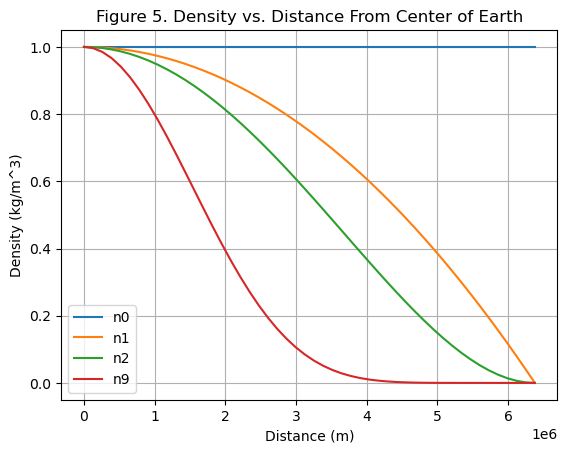

In [5]:
Rad = 6378.1e3

#density function
def density_profile(pn,r,n):
    p = pn*(1-r**2/Rad**2)**n
    return p 

r = np.linspace(0,Rad)

#finding density values for each n
density_values0 = density_profile(1,r,0)
density_values1 = density_profile(1,r,1)
density_values2 = density_profile(1,r,2)
density_values9 = density_profile(1,r,9)

#plotting
fig,ax = plt.subplots(1,)
ax.plot(r,density_values0,label="n0")
ax.plot(r,density_values1,label="n1")
ax.plot(r,density_values2,label="n2")
ax.plot(r,density_values9,label="n9")
ax.legend()
ax.grid(True)
ax.set_title("Figure 5. Density vs. Distance From Center of Earth")
ax.set_ylabel("Density (kg/m^3)")
ax.set_xlabel("Distance (m)")

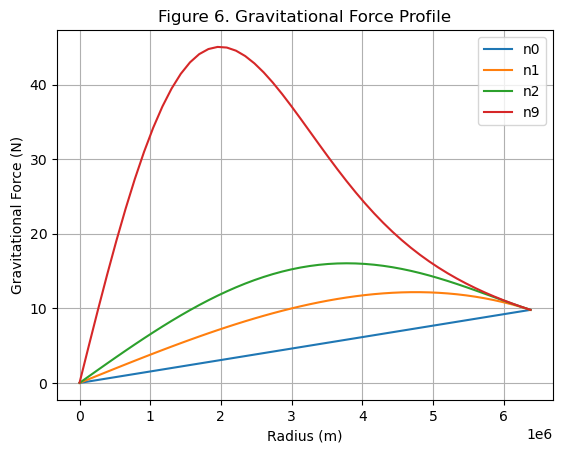

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

M = 5.972e24

r = np.linspace(1e3,6378.1e3)

#density function
def integrand(r,n):
    return ((1-r**2/Rad**2)**n)*r**2

#computing density constant for each n
def compute_density_constant(n):
    integral, _ = quad(integrand, 0, Rad, args=(n,))
    return M / (4 * np.pi * integral)

#finding mass enclosed
def mass_enclosed(r,n,density):
    def integrand_r2(r2):
        return ((1 - r2**2 / Rad**2)**n) * r2**2
    result, _ = quad(integrand_r2, 0, r)
    return 4 * np.pi * density * result

#finding force with n and density constant imput over r
def force(r,n,density):
    return np.array([6.6743e-11* mass_enclosed(ri, n, density) / ri**2 for ri in r])

#each density constant
rho0 = compute_density_constant(0)
rho1 = compute_density_constant(1)
rho2 = compute_density_constant(2)
rho9 = compute_density_constant(9)

#each force profile calculated for n
forceprofile0 = force(r, 0, rho0)
forceprofile1 = force(r, 1, rho1)
forceprofile2 = force(r, 2, rho2)
forceprofile9 = force(r, 9, rho9)

#plotting
fig,ax = plt.subplots(1,)
ax.plot(r,forceprofile0,label="n0")
ax.plot(r,forceprofile1,label="n1")
ax.plot(r,forceprofile2,label="n2")
ax.plot(r,forceprofile9,label="n9")
ax.set_xlabel('Radius (m)')
ax.set_ylabel('Gravitational Force (N)')
ax.legend()
ax.set_title('Figure 6. Gravitational Force Profile')
ax.grid(True)

The time to center (s) for each n is:  n0: 1267.2409534601416 , n1: 1096.8914820025398 , n2: 1035.13877542547 , n9: 943.8748065601559
The velocity (m/s) at center for each n is:  n0: -7905.971248072909 , n1: -10435.238778034942 , n2: -12200.745609087611 , n9: -18391.99683151908


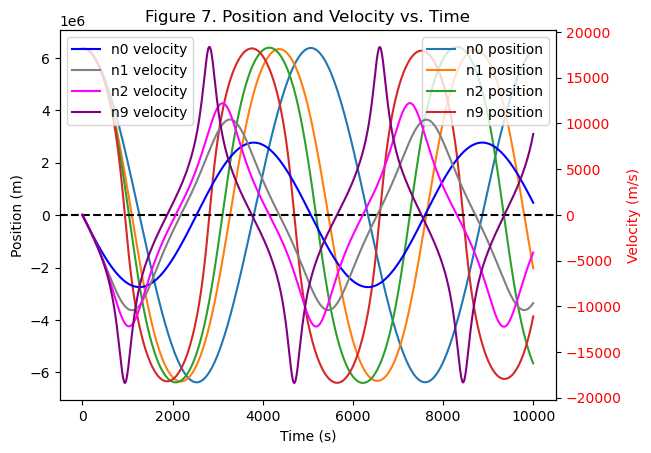

In [75]:
#force equation
def force(r,n,density):
    def mass_enclosed(r):
        def integrand_r2(r2):
            return ((1 - r2**2 / Rad**2)**n) * r2**2
        result, _ = quad(integrand_r2, 0, r)
        return 4 * np.pi * density * result

    if r==0:
        return 0
    m_enclosed = mass_enclosed(r)
    return 6.6743e-11*m_enclosed / r**2

#position differential equations
def derivatives(t,s,n,density):
    r,v = s
    dydt = v
    dvdt = -force(r,n,density)
    return dydt,dvdt

#timespan
t0,tf = (0,10000)
t_eval = np.linspace(t0,tf,1000)

#initially condition
y0 = [Rad,0]

#stopping event at center of Earth
def stopping(t,s):
    return s[0] - 0

stopping.terminal = True
stopping.direction = -1

def stopping2(t,s,*args):
    return stopping(t,s)

stopping2.terminal = False
stopping2.direction = -1

def compute_density_constant(n):
    def integrand(r):
        return ((1 - r**2 / Rad**2)**n) * r**2
    
    result, _ = quad(integrand, 0, Rad)
    return M / (4 * np.pi * result)

#calculating the density constants
rho0 = compute_density_constant(0)
rho1 = compute_density_constant(1)
rho2 = compute_density_constant(2)
rho9 = compute_density_constant(9)

#integrating for the position differential equations
sol0 = solve_ivp(derivatives, t_span=(t0, tf), y0=y0, t_eval=t_eval, args=(0, rho0), events=stopping2)
sol1 = solve_ivp(derivatives, t_span=(t0, tf), y0=y0, t_eval=t_eval, args=(1, rho1), events=stopping2)
sol2 = solve_ivp(derivatives, t_span=(t0, tf), y0=y0, t_eval=t_eval, args=(2, rho2), events=stopping2)
sol9 = solve_ivp(derivatives, t_span=(t0, tf), y0=y0, t_eval=t_eval, args=(9, rho9), events=stopping2)

#time for each n
time_to_center0 = sol0.t_events[0][0]
time_to_center1 = sol1.t_events[0][0]
time_to_center2 = sol2.t_events[0][0]
time_to_center9 = sol9.t_events[0][0]

print("The time to center (s) for each n is: ", "n0:", time_to_center0, ", n1:", time_to_center1, ", n2:", time_to_center2, ", n9:", time_to_center9)

#velocity for each n
velocity_center0 = sol0.y_events[0][0][1]
velocity_center1 = sol1.y_events[0][0][1]
velocity_center2 = sol2.y_events[0][0][1]
velocity_center9 = sol9.y_events[0][0][1]

print("The velocity (m/s) at center for each n is: ", "n0:", velocity_center0, ", n1:", velocity_center1, ", n2:", velocity_center2, ", n9:", velocity_center9)

#plotting
fig,ax = plt.subplots(1,)
ax.plot(sol0.t,sol0.y[0],label="n0 position")
ax.plot(sol1.t,sol1.y[0],label="n1 position")
ax.plot(sol2.t,sol2.y[0],label="n2 position")
ax.plot(sol9.t,sol9.y[0],label="n9 position")
ax.axhline(0, color='black', linestyle='--')
ax.set_title("Figure 7. Position and Velocity vs. Time")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")
ax.legend(loc="upper right")

ax2 = ax.twinx()
ax2.plot(sol0.t,sol0.y[1],label="n0 velocity",color='blue')
ax2.plot(sol1.t,sol1.y[1],label="n1 velocity",color='grey')
ax2.plot(sol2.t,sol2.y[1],label="n2 velocity",color='magenta')
ax2.plot(sol9.t,sol9.y[1],label="n9 velocity",color='purple')
ax2.tick_params(axis="y", labelcolor='red')
ax2.set_ylabel("Velocity (m/s)", color='red')
ax2.legend(loc="upper left")

**Part 6**

![Part 6](IMG_1861.png)

In [ ]:
print("The crossing time found was 1625.12 s, which is 470 s less than the 2195 seconds it took for the crossing time in Part 4 for the Earth.")